In [1]:
import urllib.request
import json
import csv
import pandas as pd
import numpy as np
print("import compeleted")

import compeleted


# %% [markdown]
# # Part1: Web Scraping and data cleaning

In [2]:
provinces = [
  "BeiJing", 
  "ShangHai", 
  "TianJin", 
  "ChongQing", 
  "XiangGang", 
  "Aomen", 
  "AnHui", 
  "FuJian", 
  "GuangDong", 
  "GuangXi", 
  "GuiZhou", 
  "GanSu", 
  "HaiNan", 
  "HeBei", 
  "HeNan", 
  "HeiLongJiang", 
  "HuBei", 
  "HuNan", 
  "JiLin", 
  "JiangSu", 
  "JiangXi", 
  "LiaoNing", 
  "NeiMengGu", 
  "NingXia", 
  "QingHai", 
  "ShanXi", 
  "ShanXis", 
  "ShanDong", 
  "SiChuan", 
  "TaiWan", 
  "XiZang", 
  "XinJiang", 
  "YunNan", 
  "ZheJiang"
]


res = []
for province in provinces:
  print("Start parsing data of " + province)
  p = province.lower()
  data = urllib.request.urlopen("http://interface.sina.cn/news/wap/historydata.d.json?province=" + p).read()
  history_list = json.loads(data)["data"]["historylist"]
  for h in history_list:
    h["province"] = province.lower()
    res.append(h)
  print(province + " is finished")
print("complete. Importing...")

Start parsing data of BeiJing
BeiJing is finished
Start parsing data of ShangHai
ShangHai is finished
Start parsing data of TianJin
TianJin is finished
Start parsing data of ChongQing
ChongQing is finished
Start parsing data of XiangGang
XiangGang is finished
Start parsing data of Aomen
Aomen is finished
Start parsing data of AnHui
AnHui is finished
Start parsing data of FuJian
FuJian is finished
Start parsing data of GuangDong
GuangDong is finished
Start parsing data of GuangXi
GuangXi is finished
Start parsing data of GuiZhou
GuiZhou is finished
Start parsing data of GanSu
GanSu is finished
Start parsing data of HaiNan
HaiNan is finished
Start parsing data of HeBei
HeBei is finished
Start parsing data of HeNan
HeNan is finished
Start parsing data of HeiLongJiang
HeiLongJiang is finished
Start parsing data of HuBei
HuBei is finished
Start parsing data of HuNan
HuNan is finished
Start parsing data of JiLin
JiLin is finished
Start parsing data of JiangSu
JiangSu is finished
Start parsin

In [3]:
res

e,
  'susNum': None,
  'cureNum': '3',
  'deathNum': None,
  'province': 'qinghai'},
 {'date': '02.05',
  'conNum': '18',
  'conadd': None,
  'susNum': None,
  'cureNum': '3',
  'deathNum': None,
  'province': 'qinghai'},
 {'date': '02.04',
  'conNum': '17',
  'conadd': None,
  'susNum': None,
  'cureNum': None,
  'deathNum': None,
  'province': 'qinghai'},
 {'date': '02.03',
  'conNum': '15',
  'conadd': None,
  'susNum': None,
  'cureNum': None,
  'deathNum': None,
  'province': 'qinghai'},
 {'date': '02.02',
  'conNum': '13',
  'conadd': None,
  'susNum': None,
  'cureNum': None,
  'deathNum': None,
  'province': 'qinghai'},
 {'date': '02.01',
  'conNum': '9',
  'conadd': None,
  'susNum': None,
  'cureNum': None,
  'deathNum': None,
  'province': 'qinghai'},
 {'date': '01.31',
  'conNum': '9',
  'conadd': None,
  'susNum': '1',
  'cureNum': None,
  'deathNum': None,
  'province': 'qinghai'},
 {'date': '01.30',
  'conNum': '8',
  'conadd': None,
  'susNum': '1',
  'cureNum': None,
 

In [4]:
#store the data from dict to dataframe
df = pd.DataFrame.from_dict(res)
df.head()

date conNum conadd susNum cureNum deathNum province
0  02.24    400   None   None     215        4  beijing
1  02.23    399   None   None     198        4  beijing
2  02.22    399   None   None     189        4  beijing
3  02.21    399      3   None     178        4  beijing
4  02.20    396      1   None     169        4  beijing

In [5]:
#change columns order and delete 'conadd' and 'susNum'
df = df[['province', 'date', 'conNum', 'cureNum', 'deathNum']]
df.head()

province   date conNum cureNum deathNum
0  beijing  02.24    400     215        4
1  beijing  02.23    399     198        4
2  beijing  02.22    399     189        4
3  beijing  02.21    399     178        4
4  beijing  02.20    396     169        4

In [8]:
#Capitalize province names
df['province'] = df['province'].str.capitalize() 

#Replace Provinces Names
df = df.replace({'province': 'Neimenggu'}, {'province': 'Inner Mongolia'}, regex=True)
df = df.replace({'province': 'Shanxis'}, {'province': 'Shaanxi'}, regex=True)
df = df.replace({'province': 'Aomen'}, {'province': 'Macau'}, regex=True)
df = df.replace({'province': 'Xianggang'}, {'province': 'Hong Kong'}, regex=True)
df = df.replace({'province': 'Xizang'}, {'province': 'Tibet'}, regex=True)



In [172]:
df.province.unique()

array(['Beijing', 'Shanghai', 'Tianjin', 'Chongqing', 'Hong kong',
       'Macau', 'Anhui', 'Fujian', 'Guangdong', 'Guangxi', 'Guizhou',
       'Gansu', 'Hainan', 'Hebei', 'Henan', 'Heilongjiang', 'Hubei',
       'Hunan', 'Jilin', 'Jiangsu', 'Jiangxi', 'Liaoning',
       'Inner mongolia', 'Ningxia', 'Qinghai', 'Shanxi', 'Shaanxi',
       'Shandong', 'Sichuan', 'Taiwan', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang'], dtype=object)

In [10]:
#Check Data type of each column of Dataframe
df.dtypes

province    object
date        object
conNum      object
cureNum     object
deathNum    object
dtype: object

In [11]:
#Change 'date' datatype from object to datetime
df['date'] = '2020.' + df['date']
df['date'] = pd.to_datetime(df['date'], format = '%Y.%m.%d')

#Replace 'None' to NaN
df.fillna(value=pd.np.nan, inplace=True)

# using apply method to convert columns to float
fcols=['conNum', 'cureNum', 'deathNum']
df[fcols] = df[fcols].apply(pd.to_numeric) 

In [12]:
df.head()

province       date  conNum  cureNum  deathNum
0  Beijing 2020-02-24   400.0    215.0       4.0
1  Beijing 2020-02-23   399.0    198.0       4.0
2  Beijing 2020-02-22   399.0    189.0       4.0
3  Beijing 2020-02-21   399.0    178.0       4.0
4  Beijing 2020-02-20   396.0    169.0       4.0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   province  1166 non-null   object        
 1   date      1166 non-null   datetime64[ns]
 2   conNum    1161 non-null   float64       
 3   cureNum   865 non-null    float64       
 4   deathNum  539 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 45.7+ KB


# %% [markdown]
# # Part2: Maps Visualization

In [14]:
#conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [173]:
geo_df = pd.read_csv (r'/Users/Sherry/province_loc.csv')  
geo_df.head(5)

province  latitude  longitude  population        GDPpc
0      Anhui     31.35     118.43       63.24   $7,171.00 
1  Chongqing     29.56     106.55       31.02   $9,921.00 
2     Fujian     26.08     119.31       39.41  $13,729.00 
3      Gansu     36.05     103.83       26.37   $4,725.00 
4  Guangdong     22.54     114.06      113.46  $12,956.00

In [174]:
#merge the corona dataframe and geo dataframe
geo_merged = pd.merge(geo_df, df, on='province')
china_data=geo_merged[['province','date','conNum', 'cureNum', 'deathNum', 'latitude', 'longitude', 'population', 'GDPpc']]

#delete dollar sign and change 'GDPpc' to float type
china_data['GDPpc'] = china_data['GDPpc'].str.replace('$', '')
china_data['GDPpc'] = china_data['GDPpc'].str.replace(',', '')
china_data['GDPpc'] = china_data['GDPpc'].astype(float)
#china_data['GDPpc'] = china_data['GDPpc'].apply(pd.to_numeric) 

china_data.head()

province       date  conNum  cureNum  deathNum  latitude  longitude  \
0    Anhui 2020-02-24   989.0    692.0       6.0     31.35     118.43   
1    Anhui 2020-02-23   989.0    648.0       6.0     31.35     118.43   
2    Anhui 2020-02-22   989.0    620.0       6.0     31.35     118.43   
3    Anhui 2020-02-21   989.0    567.0       6.0     31.35     118.43   
4    Anhui 2020-02-20   988.0    500.0       6.0     31.35     118.43   

   population   GDPpc  
0       63.24  7171.0  
1       63.24  7171.0  
2       63.24  7171.0  
3       63.24  7171.0  
4       63.24  7171.0

In [34]:
address = 'China'

geolocator = Nominatim(user_agent="china_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of China are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of China are 35.000074, 104.999927.


In [33]:
CLIENT_ID = 'AILDCRCACCQJKPNVLUYKPLWLMSRAEZJPQAGTE3ZDAZMSSOUF' # your Foursquare ID
CLIENT_SECRET = 'VXDL0GNP1EMWJ2RZJ433VFWSMTIYKPU5IFZTHU4LVKW5W2TP' # your Foursquare Secret
VERSION = '20200225' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AILDCRCACCQJKPNVLUYKPLWLMSRAEZJPQAGTE3ZDAZMSSOUF
CLIENT_SECRET:VXDL0GNP1EMWJ2RZJ433VFWSMTIYKPU5IFZTHU4LVKW5W2TP


In [177]:
# create map of China using latitude and longitude values
map_china = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, p in zip(china_data['latitude'], china_data['longitude'], china_data['province']):
    label = '{}'.format(p)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_china)  
    
map_china

In [181]:
# Create variable with TRUE if date is 2020-02-24
F24 = china_data['date'] == "2020-02-24"
# Select all cases where date is 2020-02-24
F24_df = china_data[F24]

F24_df.head()

province       date  conNum  cureNum  deathNum  latitude  longitude  \
0        Anhui 2020-02-24   989.0    692.0       6.0     31.35     118.43   
34   Chongqing 2020-02-24   576.0    349.0       6.0     29.56     106.55   
69      Fujian 2020-02-24   294.0    188.0       1.0     26.08     119.31   
103      Gansu 2020-02-24    91.0     80.0       2.0     36.05     103.83   
136  Guangdong 2020-02-24  1347.0    805.0       7.0     22.54     114.06   

     population    GDPpc  
0         63.24   7171.0  
34        31.02   9921.0  
69        39.41  13729.0  
103       26.37   4725.0  
136      113.46  12956.0

In [182]:


# add markers to map
for lat, lng, p, con in zip(F24_df['latitude'], F24_df['longitude'], F24_df['province'], F24_df['conNum']):
    label = '{}, {}'.format(p, con)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_china)  

map_china

 # # Part2.2: Hea## 

In [183]:
import geocoder
import folium.plugins as plugins

In [184]:
#Convert Pandas DataFrame into a List
heatdata= F24_df[['latitude', 'longitude', 'conNum']].values.tolist()

heatdata

[[31.35, 118.43, 989.0],
 [29.56, 106.55, 576.0],
 [26.08, 119.31, 294.0],
 [36.05, 103.83, 91.0],
 [22.54, 114.06, 1347.0],
 [22.82, 108.32, 252.0],
 [26.65, 106.63, 146.0],
 [39.63, 118.18, 311.0],
 [45.75, 126.63, 480.0],
 [34.67, 112.44, 1271.0],
 [30.58, 114.28, 64786.0],
 [29.12, 110.48, 1016.0],
 [40.65, 109.83, 75.0],
 [31.81, 119.97, 631.0],
 [28.68, 115.88, 934.0],
 [43.89, 125.33, 93.0],
 [41.12, 122.98, 121.0],
 [38.49, 106.25, 71.0],
 [37.36, 97.38, 18.0],
 [32.68, 109.03, 245.0],
 [36.78, 118.05, 755.0],
 [31.41, 121.49, 335.0],
 [40.08, 113.3, 133.0],
 [31.89, 101.11, 529.0],
 [44.31, 86.08, 76.0],
 [32.51, 80.1, 1.0],
 [25.04, 102.71, 174.0],
 [30.25, 120.17, 1205.0],
 [39.92, 116.38, 400.0],
 [22.21, 113.55, 10.0],
 [39.13, 117.18, 135.0],
 [23.7, 120.96, 30.0],
 [19.57, 109.95, 168.0],
 [22.32, 114.17, 81.0]]

In [185]:
plugins.HeatMap(heatdata).add_to(map_china)
map_china

## Part2.3: HeatMap over timeChoropleth Maps

In [123]:
import geopandas
import matplotlib.pyplot as plt

print('import compeleted')

import compeleted


In [186]:
gdf = geopandas.GeoDataFrame(F24_df, geometry=geopandas.points_from_xy(F24_df.longitude, F24_df.latitude))

gdf.head()

province       date  conNum  cureNum  deathNum  latitude  longitude  \
0        Anhui 2020-02-24   989.0    692.0       6.0     31.35     118.43   
34   Chongqing 2020-02-24   576.0    349.0       6.0     29.56     106.55   
69      Fujian 2020-02-24   294.0    188.0       1.0     26.08     119.31   
103      Gansu 2020-02-24    91.0     80.0       2.0     36.05     103.83   
136  Guangdong 2020-02-24  1347.0    805.0       7.0     22.54     114.06   

     population    GDPpc                    geometry  
0         63.24   7171.0  POINT (118.43000 31.35000)  
34        31.02   9921.0  POINT (106.55000 29.56000)  
69        39.41  13729.0  POINT (119.31000 26.08000)  
103       26.37   4725.0  POINT (103.83000 36.05000)  
136      113.46  12956.0  POINT (114.06000 22.54000)

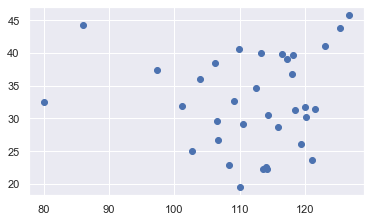

In [187]:
gdf.plot()

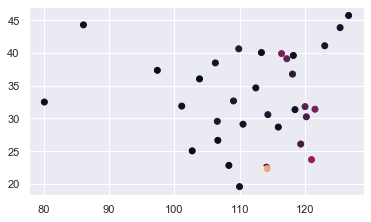

In [188]:
gdf.plot(column='GDPpc')


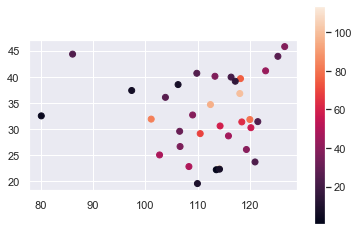

In [189]:
fig, ax = plt.subplots(1, 1)

gdf.plot(column='population', ax=ax, legend=True)

## Part2.3: Choropleth MapsSea bornHeat

In [136]:
import seaborn as sns
print('import compeleted')

import compeleted


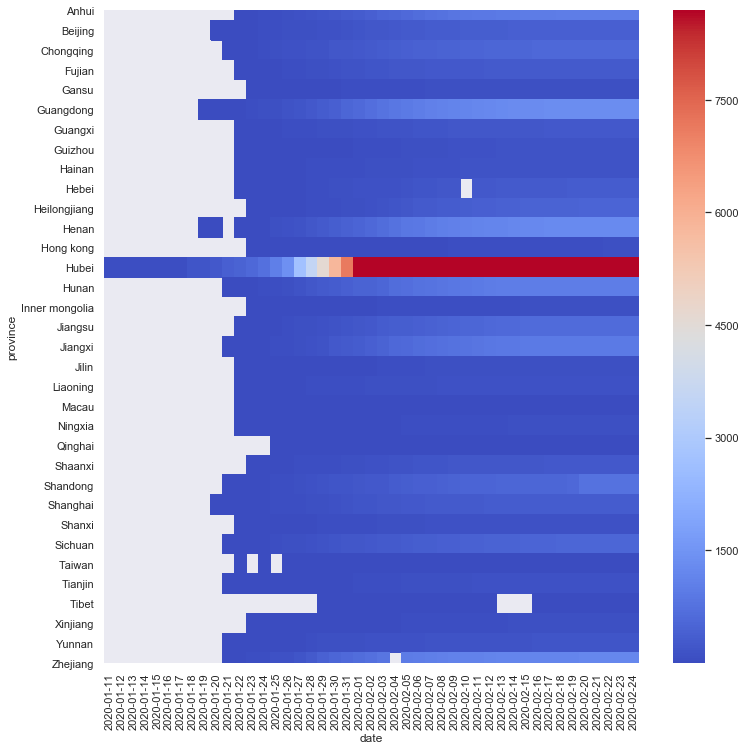

In [199]:

pivot = china_data.pivot(index='province', columns='date', values='conNum')

sns.set()
f,ax = plt.subplots(figsize=(12,12))
#ax = sns.heatmap(pivot, cmap='coolwarm', vmin=100, vmax=50000)
ax = sns.heatmap(pivot, cmap='coolwarm', robust=True) #robust sets contrast levels based on quantiles and works like an “auto-contrast” for choosing good values
ax.set_xticklabels(china_data['date'].dt.strftime('%Y-%m-%d').sort_values().unique())
#plt.xticks(rotation=-90)

plt.show()



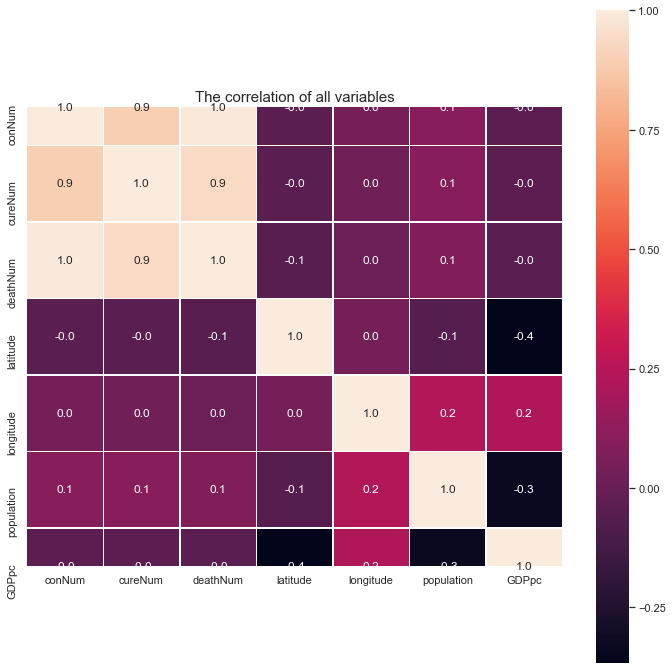

In [207]:
#Plot the heatmap on all numerical variables to get an overview of relationships between them

f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(china_data.corr(), annot=True, linewidths=.5, fmt= ".1f",ax=ax, square=True)
plt.title("The correlation of all variables",size=15)           
plt.show()